In [1]:
# 极简方案

In [1]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import MutableMapping,Iterable,Mapping,Sized

C:\Users\25564\AppData\Local\Temp\ipykernel_5928\2704148065.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import MutableMapping,Iterable,Mapping,Sized


In [2]:
# 读取数据
train_dataset = paddle.vision.datasets.MNIST(mode='train')

<Figure size 432x288 with 0 Axes>

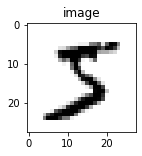

[5]


In [3]:
train_data0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])
plt.figure("Image")
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
plt.axis('on')
plt.title('image')
plt.show()
print(train_label_0)

In [4]:
# 定义mnist数据识别网络结构，同房价预测网络
class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        self.fc = paddle.nn.Linear(in_features=784,out_features=1)
        
    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs

In [5]:
model = MNIST()
def train(model):
    model.train()
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'),batch_size=16,shuffle=True)
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())

In [6]:
def norm_img(img):
    assert len(img.shape) == 3
    batch_size, img_h, img_w = img.shape[0],img.shape[1],img.shape[2]
    img = img / 255
    img = paddle.reshape(img, [batch_size,img_h*img_w])
    return img

In [8]:
paddle.vision.set_image_backend('cv2')
model = MNIST()

def train(model):
    paddle.device.set_device("gpu:0")
    model.train()
    train_loader = paddle.io.DataLoader(paddle.vision.datasets.MNIST(mode='train'),batch_size=16,shuffle=True)
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters())
    EPOCH_NUM = 10
    for epoch in range(EPOCH_NUM):
        for batch_id, data in enumerate(train_loader()):
            images = norm_img(data[0].astype('float32'))
            labels = data[1].astype('float32')
            predicts = model(images)
            
            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)
            
            if batch_id % 1000 == 0:
                print("opoch_id: {}, batch_id: {}, loss is {}".format(epoch,batch_id,avg_loss.numpy()))
            avg_loss.backward()
            opt.step()
            opt.clear_grad()
train(model)
paddle.save(model.state_dict(),'./mnist.pdparams')

opoch_id: 0, batch_id: 0, loss is [21.14196]
opoch_id: 0, batch_id: 1000, loss is [3.342372]
opoch_id: 0, batch_id: 2000, loss is [5.7993546]
opoch_id: 0, batch_id: 3000, loss is [5.5038342]
opoch_id: 1, batch_id: 0, loss is [2.4275184]
opoch_id: 1, batch_id: 1000, loss is [2.030398]
opoch_id: 1, batch_id: 2000, loss is [4.7584743]
opoch_id: 1, batch_id: 3000, loss is [4.477691]
opoch_id: 2, batch_id: 0, loss is [3.9689226]
opoch_id: 2, batch_id: 1000, loss is [2.7158594]
opoch_id: 2, batch_id: 2000, loss is [5.0130935]
opoch_id: 2, batch_id: 3000, loss is [5.3376026]
opoch_id: 3, batch_id: 0, loss is [3.2064085]
opoch_id: 3, batch_id: 1000, loss is [3.6527286]
opoch_id: 3, batch_id: 2000, loss is [1.3156374]
opoch_id: 3, batch_id: 3000, loss is [2.3669784]
opoch_id: 4, batch_id: 0, loss is [3.1425614]
opoch_id: 4, batch_id: 1000, loss is [3.282797]
opoch_id: 4, batch_id: 2000, loss is [2.1156173]
opoch_id: 4, batch_id: 3000, loss is [5.7446566]
opoch_id: 5, batch_id: 0, loss is [2.265

In [19]:
# 模型测试

In [20]:
from PIL import Image
img_path = './work/example.png'
im = Image.open(img_path)
plt.imshow(im)
plt.show()
im = im.convert('L')
print('原始图像shape: ',np.array(im).shape)
im = im.resize((28,28),Image.ANTIALIAS)
plt.imshow(im)
plt.show()
print('采样后图片shape:', np.array(im).shape)

FileNotFoundError: [Errno 2] No such file or directory: './work/example.png'

In [21]:
# 预测

# 读取一张本地的样例图片，转变成模型输入的格式
def load_image(img_path):
    # 从img_path中读取图像，并转为灰度图
    im = Image.open(img_path).convert('L')
    # print(np.array(im))
    im = im.resize((28, 28), Image.ANTIALIAS)
    im = np.array(im).reshape(1, -1).astype(np.float32)
    # 图像归一化，保持和数据集的数据范围一致
    im = 1 - im / 255
    return im

model = MNIST()
params_file_path = 'mnist.pdparams'
img_path = './work/example.jpg'
param_dict = paddle.load(params_file_path)
model.load_dict(param_dict)
model.eval()
tensor_img = load_image(img_path)
result = model(paddle.to_tensor(tensor_img))
print('result: ',result)
print('本次预测的结果是：'+result.numpy().astype('int32'))


FileNotFoundError: [Errno 2] No such file or directory: './work/example.jpg'

In [24]:
predict_data = paddle.vision.datasets.MNIST(mode='test')

Cache file /Users/wn/.cache/paddle/dataset/mnist/t10k-images-idx3-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-images-idx3-ubyte.gz 
Begin to download


item 2/2 [===========================>..] - ETA: 0s - 4ms/item


Download finished
Cache file /Users/wn/.cache/paddle/dataset/mnist/t10k-labels-idx1-ubyte.gz not found, downloading https://dataset.bj.bcebos.com/mnist/t10k-labels-idx1-ubyte.gz 
Begin to download

Download finished


In [27]:
predict_data = np.array(predict_data)
predict_data.shape

/var/folders/wd/8wzyf1t512s625px80dm4ctm0000gn/T/ipykernel_4265/3569759674.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predict_data = np.array(predict_data)


(10000, 2)

In [34]:
for i in range(20,50):
    im = predict_data[i][0]
    im = np.array(im).reshape(1, -1).astype(np.float32)
    # 图像归一化，保持和数据集的数据范围一致
    im = im / 255

    model = MNIST()
    params_file_path = 'mnist.pdparams'
    param_dict = paddle.load(params_file_path)
    model.load_dict(param_dict)
    model.eval()
    tensor_img = im
    result = model(paddle.to_tensor(tensor_img))
    print('本次预测的结果是：', result.numpy().astype('int32'),'实际是：',predict_data[i][1])

本次预测的结果是： [[7]] 实际是： [9]
本次预测的结果是： [[5]] 实际是： [6]
本次预测的结果是： [[3]] 实际是： [6]
本次预测的结果是： [[5]] 实际是： [5]
本次预测的结果是： [[4]] 实际是： [4]
本次预测的结果是： [[0]] 实际是： [0]
本次预测的结果是： [[6]] 实际是： [7]
本次预测的结果是： [[4]] 实际是： [4]
本次预测的结果是： [[1]] 实际是： [0]
本次预测的结果是： [[2]] 实际是： [1]
本次预测的结果是： [[5]] 实际是： [3]
本次预测的结果是： [[2]] 实际是： [1]
本次预测的结果是： [[4]] 实际是： [3]
本次预测的结果是： [[3]] 实际是： [4]
本次预测的结果是： [[5]] 实际是： [7]
本次预测的结果是： [[1]] 实际是： [2]
本次预测的结果是： [[6]] 实际是： [7]
本次预测的结果是： [[1]] 实际是： [1]
本次预测的结果是： [[2]] 实际是： [2]
本次预测的结果是： [[3]] 实际是： [1]
本次预测的结果是： [[1]] 实际是： [1]
本次预测的结果是： [[6]] 实际是： [7]
本次预测的结果是： [[6]] 实际是： [4]
本次预测的结果是： [[2]] 实际是： [2]
本次预测的结果是： [[4]] 实际是： [3]
本次预测的结果是： [[4]] 实际是： [5]
本次预测的结果是： [[4]] 实际是： [1]
本次预测的结果是： [[4]] 实际是： [2]
本次预测的结果是： [[8]] 实际是： [4]
本次预测的结果是： [[4]] 实际是： [4]
